In [1]:
import torch
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation import *

In [39]:
n=5
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(1e6),59304(1e8),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5()
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


In [40]:
index,value=0,10
for i in tqdm(range(150000), desc="Training Progress"):
    A=get_xinmeng_like_matrix(n,seed=i).T
    epochs=500
    _,__=test_row(A=A,epochs=50,if_plot=False)
    if __ > value and _ < 2 and __ <1e7:
        index,value=i,__
print(index,value)
_,__=test_row(get_xinmeng_like_matrix(n,seed=index).T)
print(f"{_:.4e}, {__:.4e}")

Training Progress: 100%|██████████| 150000/150000 [00:37<00:00, 4006.77it/s]

85395 1906832.5293241686
1.7891e+00, 1.9068e+06


In [2]:
n=5
A=get_xinmeng_like_matrix(n,seed=85395).T#85395(2e6),59304(6e7),44292(1e9)
B=get_B(A=A,u=2*n,n=n)
h_data,y_data,X_test,y_test=prepare_node_5()
_,__=test_row(A)
print(f"{_:.4e}, {__:.4e}")

1.7891e+00, 1.9068e+06


首先看两层神经网络，<font color=blue>调出不同算法的最优超参数</font>

Training Progress:   0%|          | 0/1500 [00:00<?, ?it/s, accuracy=12.8000000000%, epoch=1, loss=1.8053807020]

Training Progress: 100%|██████████| 1500/1500 [01:34<00:00, 15.79it/s, accuracy=79.8000000000%, epoch=1500, loss=0.0877156764]


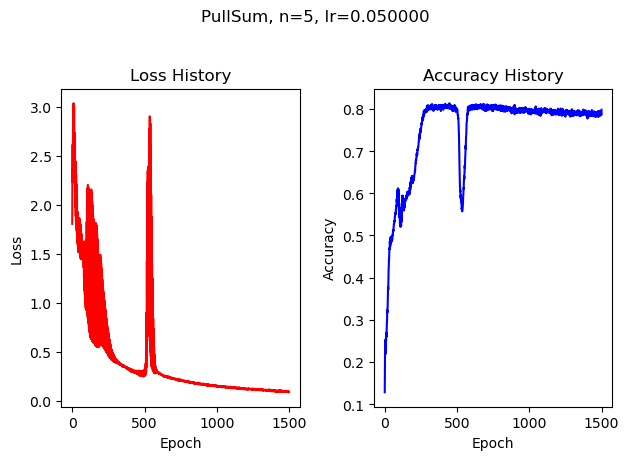

In [36]:
l1,a1=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(5e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress:   0%|          | 2/1500 [00:00<01:43, 14.44it/s, accuracy=22.4000000000%, epoch=3, loss=2.3003842115]

Training Progress: 100%|██████████| 1500/1500 [01:34<00:00, 15.84it/s, accuracy=79.6600000000%, epoch=1500, loss=0.0988245159]


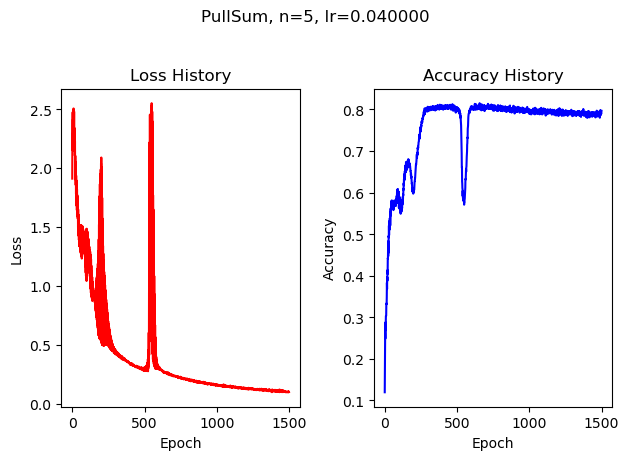

In [37]:
l2,a2=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(4e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress:   0%|          | 2/1500 [00:00<01:45, 14.15it/s, accuracy=17.6000000000%, epoch=2, loss=2.2380289793]

Training Progress: 100%|██████████| 1500/1500 [01:37<00:00, 15.36it/s, accuracy=80.1400000000%, epoch=1500, loss=0.1230750725]


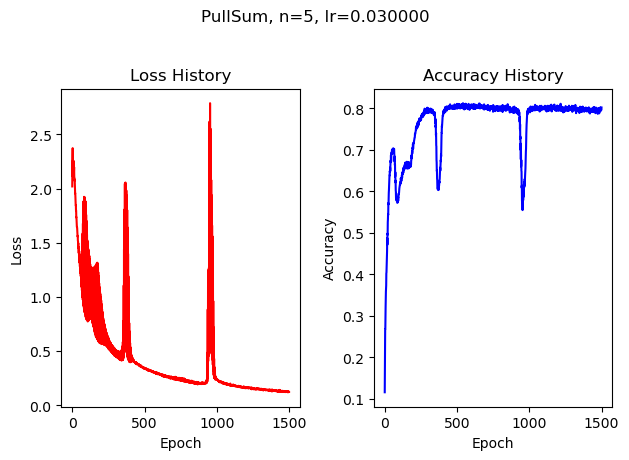

In [38]:
l3,a3=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(3e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress:   1%|          | 15/1500 [00:00<00:35, 42.17it/s, accuracy=46.5000000000%, epoch=15, loss=2.0338673592]

Training Progress: 100%|██████████| 1500/1500 [01:34<00:00, 15.85it/s, accuracy=79.7200000000%, epoch=1500, loss=0.1612899736]


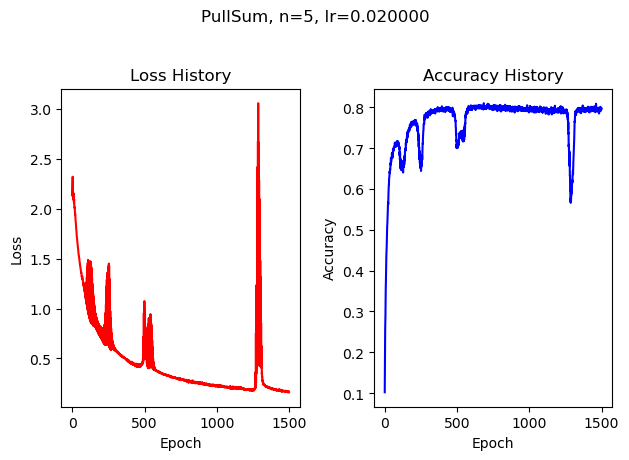

In [39]:
l4,a4=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(2e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress:   0%|          | 0/1500 [00:00<?, ?it/s]

Training Progress: 100%|██████████| 1500/1500 [01:36<00:00, 15.48it/s, accuracy=80.4800000000%, epoch=1500, loss=0.2401583433]


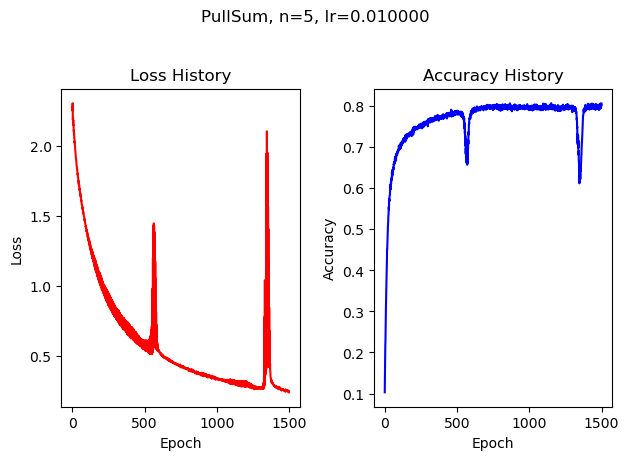

In [8]:
l5,a5=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:33<00:00, 16.07it/s, accuracy=80.3600000000%, epoch=1500, loss=0.2433101773]


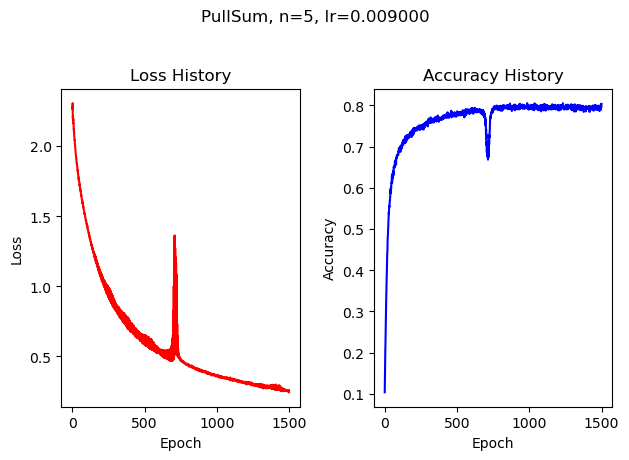

In [9]:
l6,a6=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(9e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:36<00:00, 15.48it/s, accuracy=80.2600000000%, epoch=1500, loss=0.3063486457]


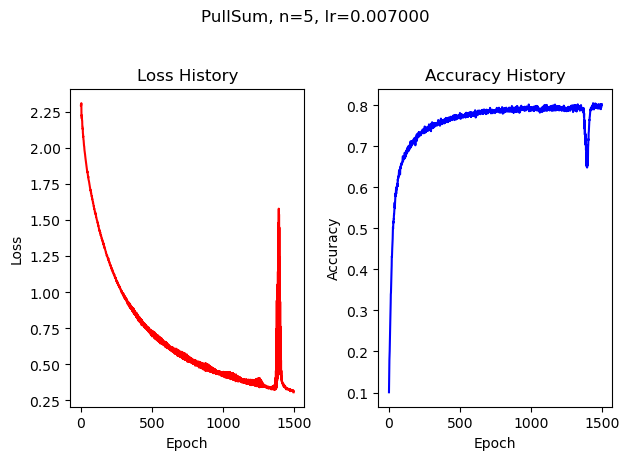

In [10]:
l7,a7=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(7e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:37<00:00, 15.39it/s, accuracy=80.0600000000%, epoch=1500, loss=0.3896140456]


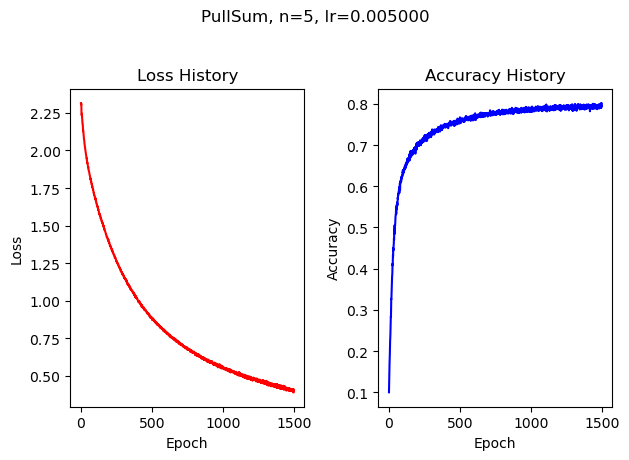

In [11]:
l8,a8=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(5e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:33<00:00, 16.08it/s, accuracy=79.0600000000%, epoch=1500, loss=0.5901206791]


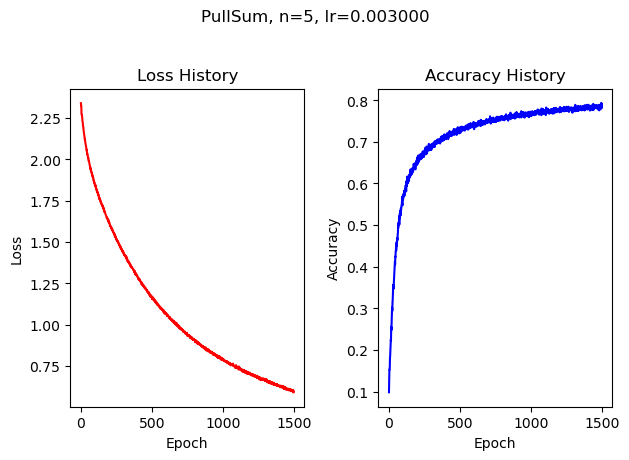

In [12]:
l9,a9=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(3e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:36<00:00, 15.54it/s, accuracy=73.5200000000%, epoch=1500, loss=1.1613166094]


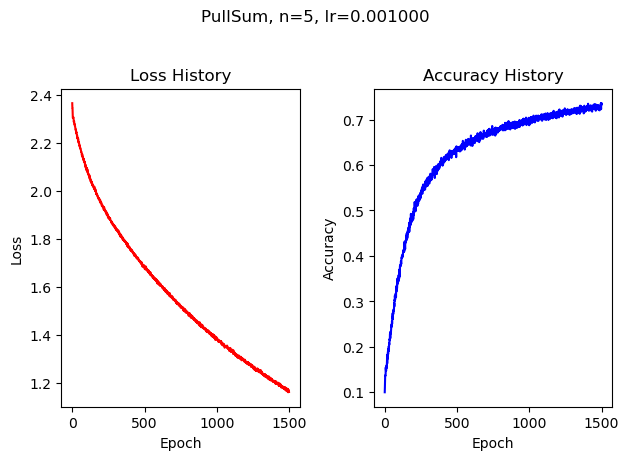

In [13]:
l10,a10=train_PullSum(n=n,A=A,B=B,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

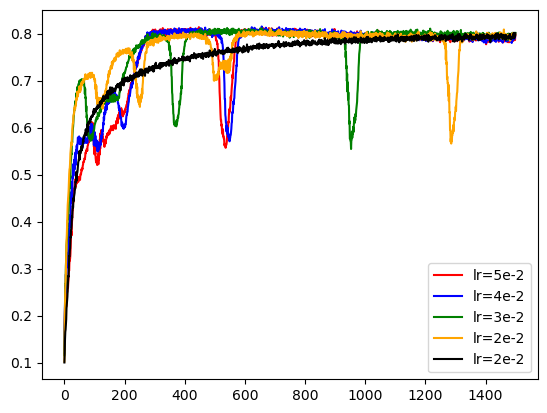

In [46]:
plt.plot(a1,color='red',label='lr=5e-2')
plt.plot(a2,color='blue',label='lr=4e-2')
plt.plot(a3,color='g',label='lr=3e-2')
plt.plot(a4,color='orange',label='lr=2e-2')
plt.plot(a8,color='black',label='lr=2e-2')
plt.legend()
plt.show()

<font color=red>下面是pull diag算法</font>

Training Progress: 100%|██████████| 1500/1500 [01:36<00:00, 15.48it/s, accuracy=35.8000000000%, epoch=1500, loss=86412.9871093750] 


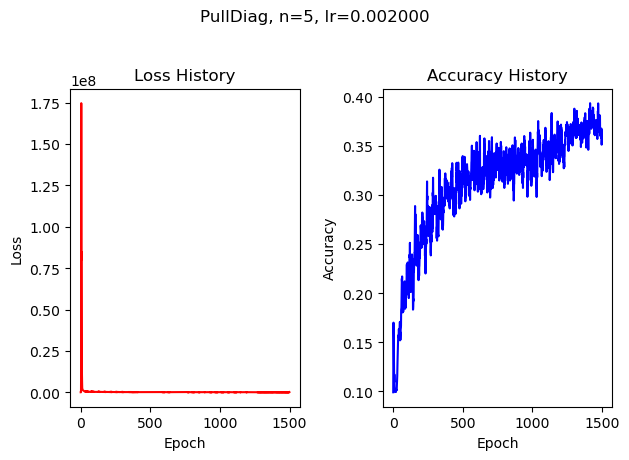

In [14]:
L1,A1=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-2/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:34<00:00, 15.82it/s, accuracy=34.4200000000%, epoch=1500, loss=70.9150257111] 


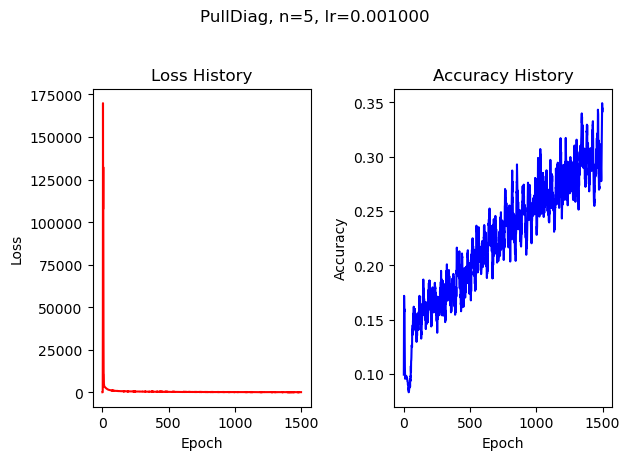

In [15]:
L2,A2=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(5e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:37<00:00, 15.41it/s, accuracy=46.4400000000%, epoch=1500, loss=2.0002602816]


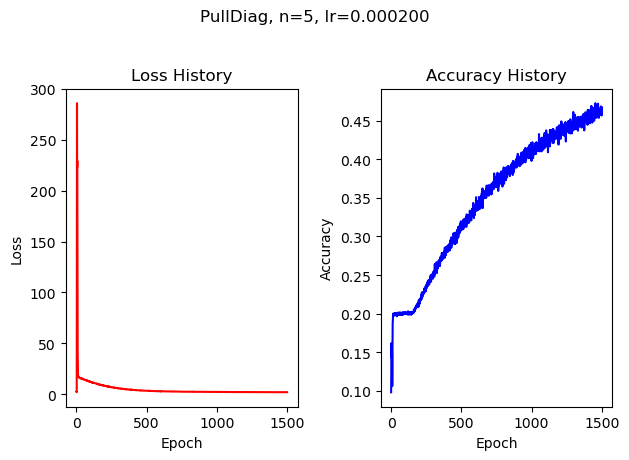

In [16]:
L3,A3=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:35<00:00, 15.77it/s, accuracy=31.9800000000%, epoch=1500, loss=2.6632982254]


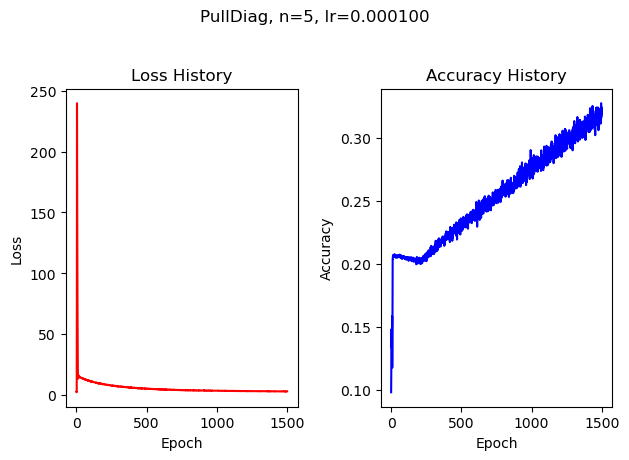

In [17]:
L4,A4=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(5e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:35<00:00, 15.69it/s, accuracy=27.3000000000%, epoch=1500, loss=2.7205799818]


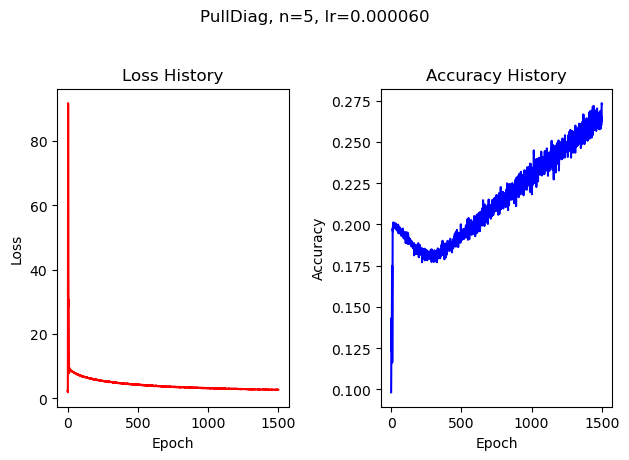

In [18]:
L5,A5=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(3e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:37<00:00, 15.43it/s, accuracy=17.0000000000%, epoch=1500, loss=6.1481957614]


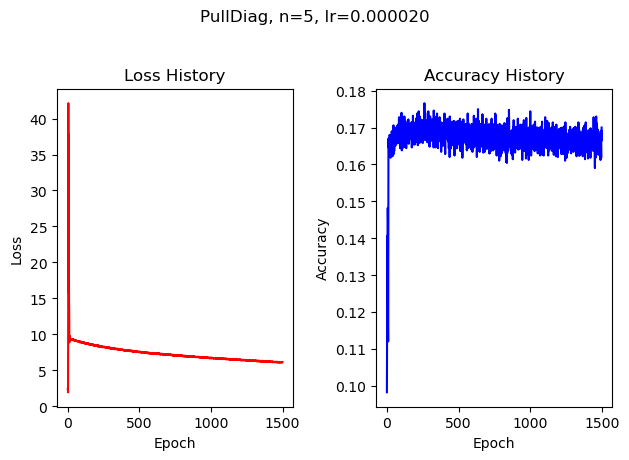

In [19]:
L6,A6=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:33<00:00, 15.99it/s, accuracy=19.2200000000%, epoch=1500, loss=10.9429390728]


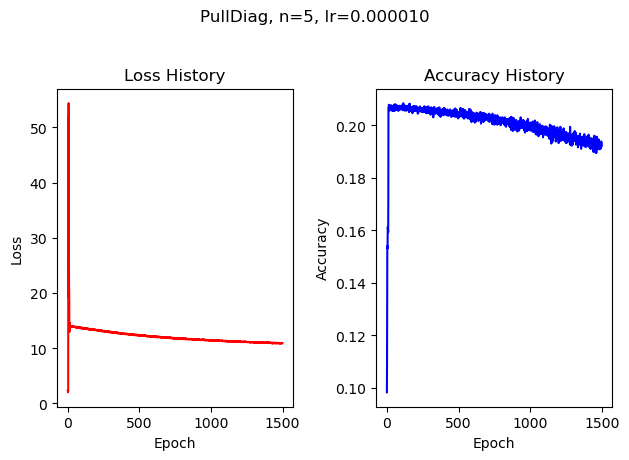

In [20]:
L7,A7=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(5e-5/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:35<00:00, 15.68it/s, accuracy=20.5000000000%, epoch=1500, loss=5.2003052354]


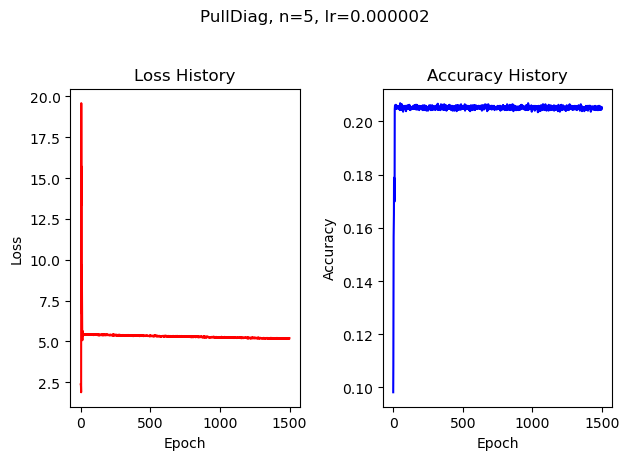

In [21]:
L8,A8=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(1e-5/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:34<00:00, 15.80it/s, accuracy=32.7800000000%, epoch=1500, loss=8.2328604698] 


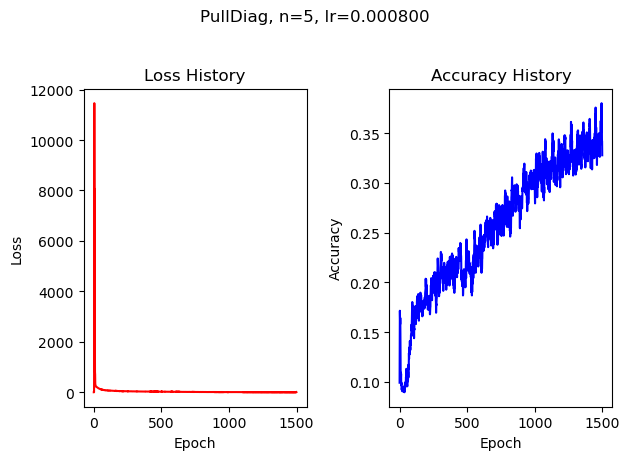

In [49]:
L9,A9=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(4e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:33<00:00, 16.00it/s, accuracy=44.2400000000%, epoch=1500, loss=2.2702330589]


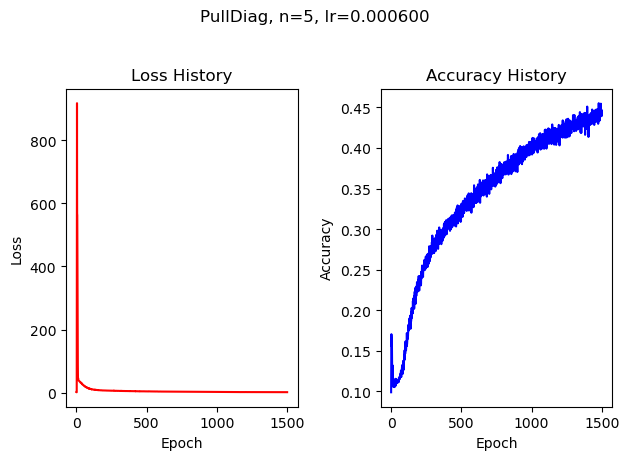

In [50]:
L10,A10=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(3e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:35<00:00, 15.65it/s, accuracy=49.9000000000%, epoch=1500, loss=1.6155331850]


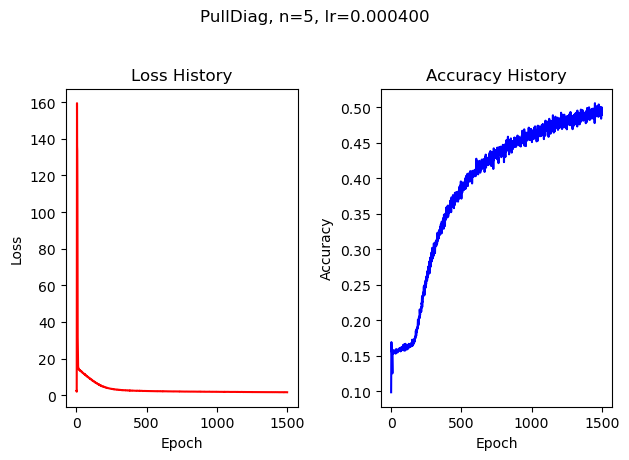

In [51]:
L11,A11=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(2e-3/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:36<00:00, 15.50it/s, accuracy=44.6400000000%, epoch=1500, loss=1.9959432364]


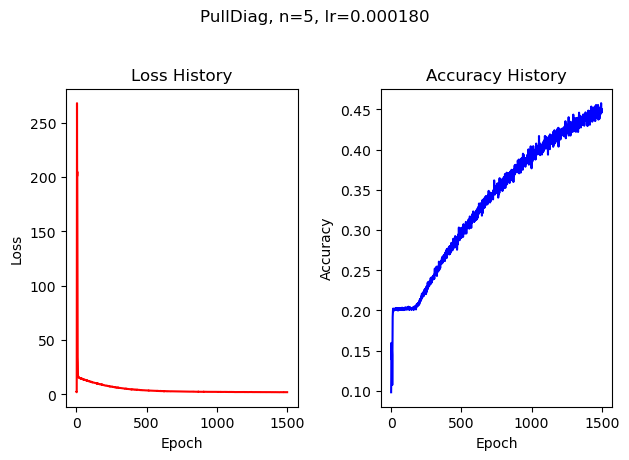

In [52]:
L12,A12=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(9e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:35<00:00, 15.71it/s, accuracy=41.4800000000%, epoch=1500, loss=2.1833422422]


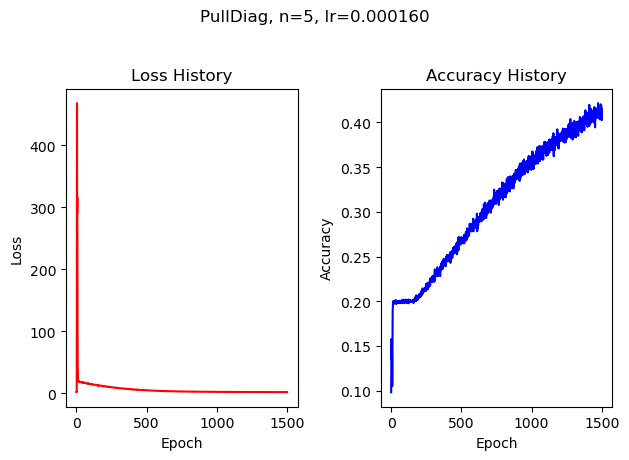

In [53]:
L13,A13=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(8e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

Training Progress: 100%|██████████| 1500/1500 [01:39<00:00, 15.15it/s, accuracy=38.4000000000%, epoch=1500, loss=2.3078438997]


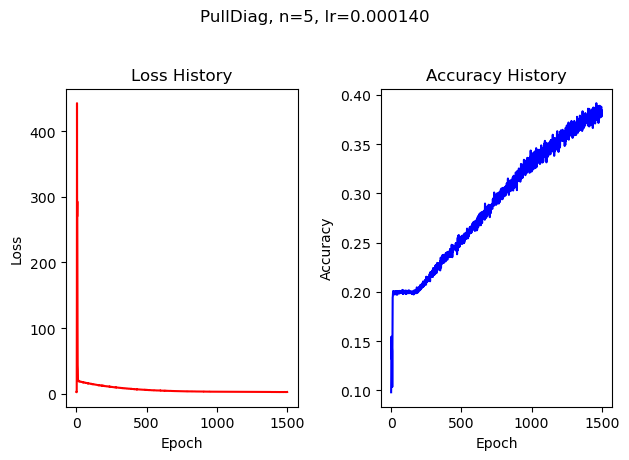

In [54]:
L14,A14=train_PullDiag(n=n,A=A,model_class=MNISTClassifier_2layer_2,seed_for_model=49,criterion_class=nn.CrossEntropyLoss,epochs=1500,lr=(7e-4/n),X_train_data=h_data,y_train_data=y_data,X_test_data=X_test,y_test_data=y_test,compute_accuracy=compute_accuracy_multiclass)

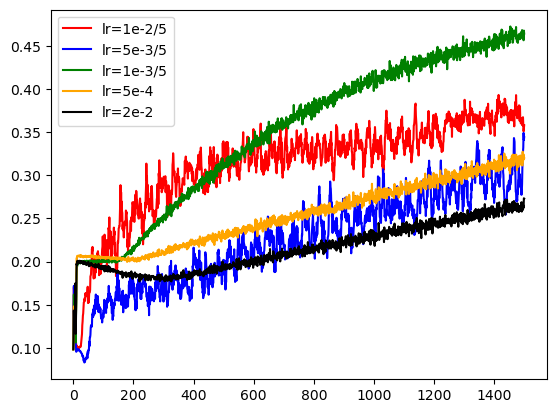

In [48]:
plt.plot(A1,color='red',label='lr=1e-2/5')
plt.plot(A2,color='blue',label='lr=5e-3/5')
plt.plot(A3,color='g',label='lr=1e-3/5')
plt.plot(A4,color='orange',label='lr=5e-4')
plt.plot(A5,color='black',label='lr=2e-2')
plt.legend()
plt.show()